# 主題 01-2. 取回訓練好的神經網路

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## 1. 找回我們的神經網路

我們這裡需要把結構和 weights 取回, 要注意的是還需要再 compile 一次, 所以在 complie 中用到的 optimizer 等還是需要告訴 Keras 的。

In [2]:
%env KERAS_BACKEND=tensorflow

env: KERAS_BACKEND=tensorflow


In [3]:
from keras.models import model_from_json
from keras.optimizers import SGD

Using TensorFlow backend.
/Users/mac/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [4]:
model = model_from_json(open('handwriting_model_architecture.json').read())
model.load_weights('handwriting_model_weights.h5')

In [5]:
model.compile(loss='mse', optimizer=SGD(lr=0.1))

## 2. 資料再讀回來

In [6]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

我們只轉測試資料。

In [7]:
x_test = x_test.reshape(10000, 784)

## 3. 找一個來試試

In [28]:
# n_test = 1234

n_test=9487

In [29]:
x = x_test[n_test]

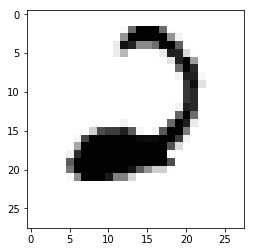

In [30]:
plt.imshow(x.reshape(28,28), cmap='Greys')

In [31]:
model.predict_classes(x.reshape(1,784))

1/1 [==============================] - 0s 3ms/step


array([2])